In [1]:
#Author Alex J. Yang, alexjieyang@outlook.com

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import igraph as ig
from collections import Counter
import scipy.stats
import seaborn as sns
import networkx as nx

In [15]:
def components(datac , ff1 , n):
    N = nx.Graph(n)
    components = []
    for i in ff1.sort_values(datac,ascending=False).index:
        components.append(len(max(nx.connected_components(N), key=len)))
        N.remove_nodes_from([i])
    return components

In [16]:
markers = ["o" , "s" , "d" , "^"]

def drawx(componentslst , labellst):
    c = plt.rcParams['axes.prop_cycle'].by_key()['color']
    f, ax = plt.subplots(figsize=(12, 8))
    
    for i in range(len(componentslst)):
        components = np.array(componentslst[i])
        label = labellst[i]
        
        size = rescaled_arr = np.interp(components, (components.min(), components.max()), (10, 50))
        
        plt.scatter(range(len(n)),components,s=size , marker = markers[i],edgecolors=c[i],alpha=.9 , label = label)
        plt.plot(range(len(n)),components, c = c[i],linestyle = '--', linewidth=3.5)
    

    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.legend(fontsize = 25 , loc = 'lower left')
    plt.show()

In [17]:
def drawx2(componentslst , labellst):
    c = plt.rcParams['axes.prop_cycle'].by_key()['color']
    f, ax = plt.subplots(figsize=(6, 4))
    
    for i in range(len(componentslst)):
        components = np.array(componentslst[i])
        label = labellst[i]
        
        size = rescaled_arr = np.interp(components, (components.min(), components.max()), (10, 100))
        plt.scatter(range(len(n)),components,s=size, marker = markers[i],edgecolors=c[i+3],alpha=.6 , label = label)
        plt.plot(range(len(n)),components, c = c[i+3],linestyle = '--', linewidth=3.5)
    

    plt.xticks(fontsize=15)
    plt.yticks(fontsize=21)
    plt.legend(fontsize = 23)
    plt.show()

# Blogs

In [18]:
with open(file_path1) as f:
    d = f.readlines()
    
edgesdata = []
for i in d:
    edgesdata.append(i.strip().split()[::-1])
edgesdata = np.array(edgesdata).astype(int)
g = ig.Graph(edges=edgesdata, directed=True)

n = g.to_networkx()

ff = pd.read_csv(path1)
ff = ff[['D', '2stepD', 'CD', 'degree', 'h-index', 'pagerank']]

In [19]:
componentslst = []
labellst = []

ff1 = ff[ff['degree']>0]
n.remove_nodes_from(ff[ff['degree']==0].index)
for column in ff.columns:
    label = column
    component = components(column , ff1 , n)
    componentslst.append(component)
    label = label + "  " + "{}".format(np.round(sum(component) / len(component)/len(component) , 3) )
    labellst.append(label)

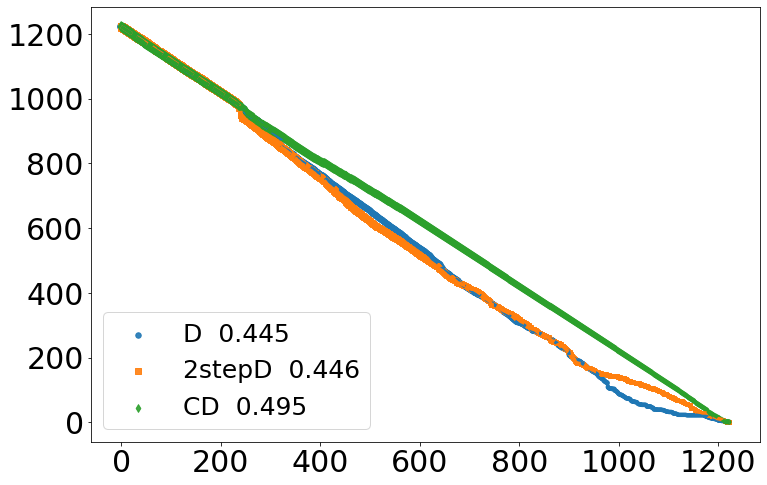

In [20]:
drawx(componentslst[:3] , labellst[:3])

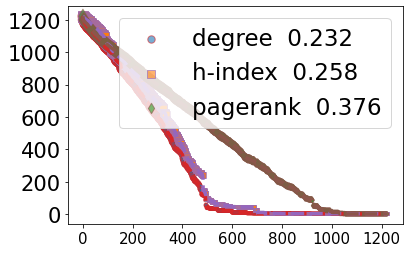

In [21]:
drawx2(componentslst[3:] , labellst[3:])

# Email

In [7]:
with open(file_path2) as f:
    d = f.readlines()
    
edgesdata = []
for i in d:
    edgesdata.append(i.strip().split()[:2][::-1])
edgesdata = np.array(edgesdata).astype(int)

g = ig.Graph(edges=edgesdata, directed=True)
n = g.to_networkx()

ff = pd.read_csv(path2)
ff = ff[['D', '2stepD', 'CD', 'degree', 'h-index', 'pagerank']]

In [8]:
componentslst = []
labellst = []
for column in ff.columns:
    label = column
    component = components(column , ff , n)
    componentslst.append(component)
    label = label + "  " + "{}".format(np.round(sum(component) / len(component)/len(component) , 3) )
    labellst.append(label)

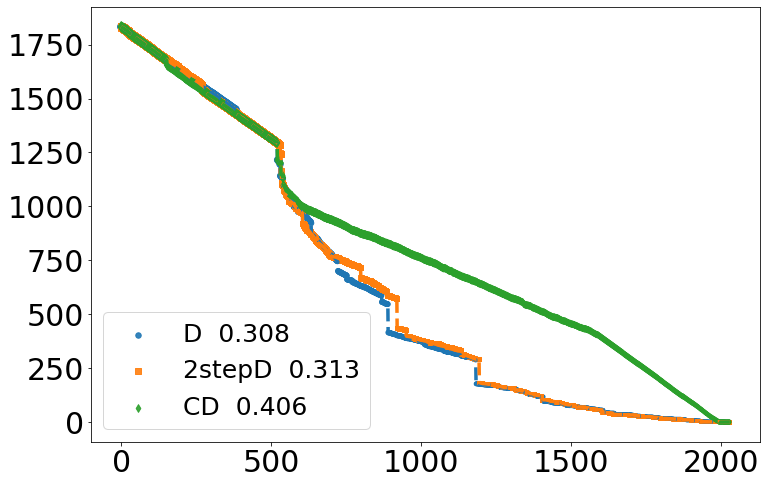

In [13]:
drawx(componentslst[:3] , labellst[:3])

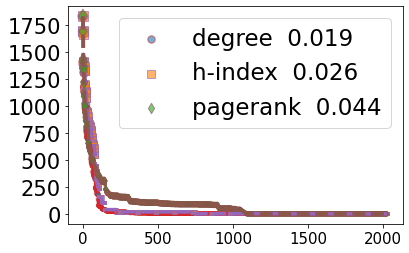

In [14]:
drawx2(componentslst[3:] , labellst[3:])

# Wiki

In [22]:
with open(file_path3) as f:
    d = f.readlines()
    
edgesdata = []
for i in d:
    edgesdata.append(i.strip().split()[:2][::-1])
edgesdata = np.array(edgesdata).astype(int)

g = ig.Graph(edges=edgesdata, directed=True)
n = g.to_networkx()

ff = pd.read_csv(path3)
ff = ff[['D', '2stepD', 'CD', 'degree', 'h-index', 'pagerank']]

In [23]:
componentslst = []
labellst = []

for column in ff.columns:
    label = column
    component = components(column , ff , n)
    componentslst.append(component)
    label = label + "  " + "{}".format(np.round(sum(component) / len(component)/len(component) , 3) )
    labellst.append(label)

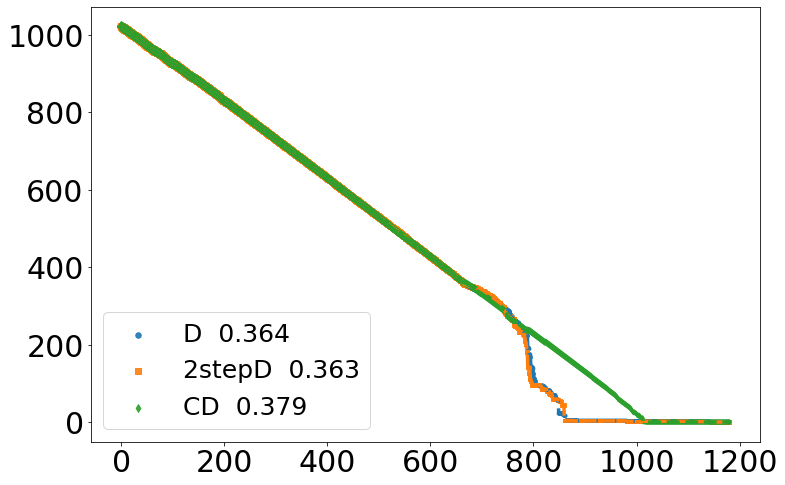

In [24]:
drawx(componentslst[:3] , labellst[:3])

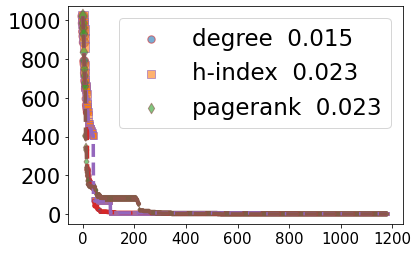

In [25]:
drawx2(componentslst[3:] , labellst[3:])

# APS

In [115]:
path1 = r'E:\netData\APS\aps-dataset-citations-2010.zip'
f1 = pd.read_csv(path1)

f1 = f1[['citing_doi', 'cited_doi']]

ff = pd.read_csv(r'E:\netData\APS\3 properties\nodepro2010.zip')

f1['citing_id'] = f1['citing_doi'].map(dict(zip(ff['id'],ff.index)))
f1['cited_id'] =  f1['cited_doi'].map(dict(zip(ff['id'],ff.index)))
f11 = f1[['cited_id','citing_id']].copy()
f11 = f11[f11.columns[::-1]]

g = ig.Graph.DataFrame(f11, directed=True)

n = g.to_networkx()

In [116]:
ff = ff[['D', '2stepD', 'CD', 'degree', 'h', 'pagerank']]

In [117]:
ff1 = ff[ff['degree']>200]

In [118]:
n.remove_nodes_from(ff[ff['degree']<=200].index)

In [119]:
componentslst = []
labellst = []
for column in ff.columns:
    label = column
    component = components(column , ff1 , n)
    componentslst.append(component)
    label = label + "  " + "{}".format(np.round(sum(component) / len(component)/len(component) , 3) )
    labellst.append(label)

In [120]:
ff1.columns

Index(['D', '2stepD', 'CD', 'degree', 'h', 'pagerank'], dtype='object')

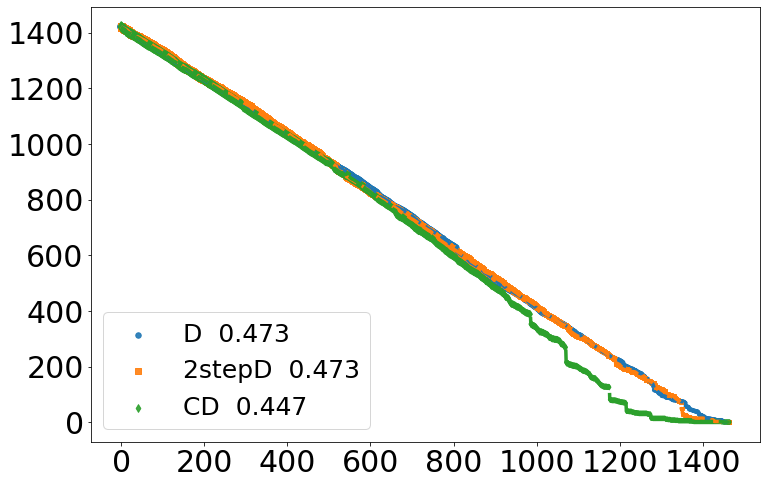

In [121]:
drawx(componentslst[:3] , labellst[:3])

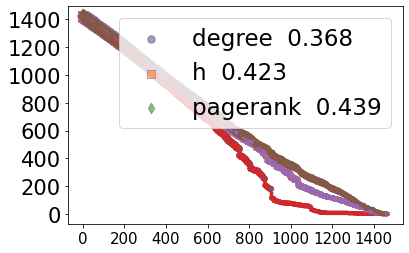

In [122]:
drawx2(componentslst[3:] , labellst[3:])